# Gesture Recognition- TREX GAME

In [11]:
import cv2
import numpy as np
import datetime
import time
import pyautogui
import webbrowser
import matplotlib.pyplot as plt

In [12]:

pyautogui.click(x=1500,y=450)
pyautogui.click(x=1500,y=450)

vid = cv2.VideoCapture(1)

t_d=r_d=l_d=b_d=0


while True:
    
    b,frame = vid.read()
    frame = cv2.flip(frame,1)
    img = frame[10:300,350:700]
    cv2.rectangle(frame,(350,10),(700,300),(0,255,0),1)
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    l_r = np.array([0,38,80],dtype="uint8")
    u_r = np.array([50,255,255],dtype="uint8")
    skin = cv2.inRange(hsv,l_r,u_r)
    kernel = (13,13)
    skin = cv2.erode(skin,kernel,iterations=2)
    skin = cv2.dilate(skin,kernel,iterations=2)

    skin = cv2.medianBlur(skin,13)

    cont,hier = cv2.findContours(skin,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cont = max(cont,key=lambda x: cv2.contourArea(x))
    cv2.drawContours(img,[cont],-1,(255,255,0),2)

    hull = cv2.convexHull(cont)
    cv2.drawContours(img,[hull],-1,(0,255,255),2)

    t=tuple(hull[hull[:,:,1].argmin()][0])
    b=tuple(hull[hull[:,:,1].argmax()][0])
    l=tuple(hull[hull[:,:,0].argmin()][0])
    r=tuple(hull[hull[:,:,0].argmax()][0])
    
    cX=int((l[0] + r[0])/2)
    cY=int((t[0]+ b[0])/2)
    
    lr = np.linalg.norm(l[-1]-r[-1])
    if(lr<20):
        cv2.putText(frame,"Jumping",(0,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255
    ,255,0),2,cv2.LINE_AA)
        
        pyautogui.press('up')
        
    elif(lr>25):
        cv2.putText(frame,"Running",(0,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255
    ,255,0),2,cv2.LINE_AA)
    
    
    
    
    cv2.circle(img,l,1,(255,0,0),2)
    cv2.circle(img,r,1,(255,0,0),2)
    
    
    
    cv2.imshow("Video",cv2.Canny(frame,100,200))

    
    
    if cv2.waitKey(1) & 0xFF==ord('q'):  
        
        cv2.destroyAllWindows()
        break
    
      


## LAST FRAMES SHOWING DETECTED HAND

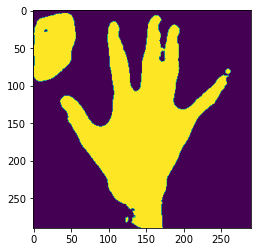

In [14]:
#Detected Hand
plt.imshow(skin)

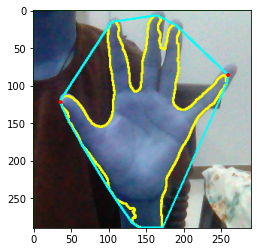

In [19]:
#Detected Contours and Drawn Hull
plt.imshow(img)

------